# PyTorch

In [ ]:
ssh-keygen -t ed25519 -C "philipp.blankenhagen@gmail.com"

In [ ]:
git config --global user.name "Philipp-Blankenhagen"
git config --global user.email "philipp.blankenhagen@gmail.com"


In [1]:
ip = get_ipython()
ip.sphinxify_docstring = True
ip.enable_html_pager = True

In [4]:
import torch as t
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [5]:
t_v = torch.Tensor([1,2,3])
t_m = torch.Tensor([[1,2],[3,4]])

In [6]:
t_v@t_v
t.dot(t_v,t_v)

tensor(14.)

In [7]:
# create a 2 x 3 tensor with random values
empty_tensor = torch.Tensor(2, 3)

# create a 2 x 3 tensor with random values between -1and 1
uniform_tensor = torch.Tensor(2, 3).uniform_(-1, 1)

# create vector with normal distribution samples
normal_vector = torch.Tensor(2,1).normal_(mean=0,std=1)

In [8]:
# Slicing is like in numpy
t_m[0,0]=5
t_m
t_m[:,0]

# Reshaping is like in numpy
t_m.reshape(4,)

# getting info
print(t_m.shape)
print(t_m.type())

# Basic operations
t_m.T # Transpose
t_m@t_m

t_m@t_m # Matrix multiplication
t_m.numpy()@t_m.numpy() # Like in numpy

torch.Size([2, 2])
torch.FloatTensor


array([[31., 18.],
       [27., 22.]], dtype=float32)

In [9]:
# Convert
np_m = np.array([[1,2],[3,4]])

torch.from_numpy(np_m)
type(torch.from_numpy(np_m).numpy()) ==type(np_m)


True

## Linear Regression

In [10]:
import torch
from torch.autograd import Variable # Variable can then be used for backpropagation
from torch.nn import functional as F

# My line: y = 3x + 4
x_vector = torch.Tensor(100).uniform_(-20,20)[:,None] # data needs to be in vector form
y_vector = 3*x_vector +4
x_data = Variable(x_vector) 
y_data = Variable(y_vector)


In [1]:
class LinearRegression(torch.nn.Module): # Class needs to be from torch.nn.Module
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1,bias=False)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    

NameError: name 'torch' is not defined

In [29]:
class LinearRegression(torch.nn.Module): # Class needs to be from torch.nn.Module
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1,bias=False)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    

model = LinearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


for epoch in range(3):
    print('\n\n Epoch:',epoch)
    for i in model.parameters():
        print('Parameters before',i)
    optimizer.zero_grad() # Reset the gradient
    
    # Forward pass
    y_pred = model.forward(x_data)
    #print('y_pred',y_pred)
    
    # Compute Loss
    loss = criterion(y_pred, y_data)
    print('\nloss',loss)

    
    # Backward pass
    loss.backward()
    for param in model.parameters():
        print('\nGradient',param.grad.data)
    
    optimizer.step()
    for i in model.parameters():
        print('Parameters after step',i)
print(loss)



 Epoch: 0
Parameters before Parameter containing:
tensor([[-0.0068]], requires_grad=True)

loss tensor(1251.6267, grad_fn=<MseLossBackward0>)

Gradient tensor([[-813.8240]])
Parameters after step Parameter containing:
tensor([[0.8070]], requires_grad=True)


 Epoch: 1
Parameters before Parameter containing:
tensor([[0.8070]], requires_grad=True)

loss tensor(678.0598, grad_fn=<MseLossBackward0>)

Gradient tensor([[-595.7359]])
Parameters after step Parameter containing:
tensor([[1.4028]], requires_grad=True)


 Epoch: 2
Parameters before Parameter containing:
tensor([[1.4028]], requires_grad=True)

loss tensor(370.7115, grad_fn=<MseLossBackward0>)

Gradient tensor([[-436.0912]])
Parameters after step Parameter containing:
tensor([[1.8389]], requires_grad=True)
tensor(370.7115, grad_fn=<MseLossBackward0>)


# Linear Regression manual

In [742]:
df = pd.read_csv('../MI1/RegressionData.txt', sep = ' ',header = None)



Epoch 0, Error 10.470821370153146
Epoch 25, Error 4.0324846194161585
Epoch 50, Error 3.0743509316028086
Epoch 75, Error 2.537599055344322
Epoch 100, Error 2.236906740026455
Epoch 125, Error 2.0684567122002466
Epoch 150, Error 1.9740897781977793
Epoch 175, Error 1.9212247336029902
Epoch 200, Error 1.891609350105037
Epoch 225, Error 1.8750185963006365


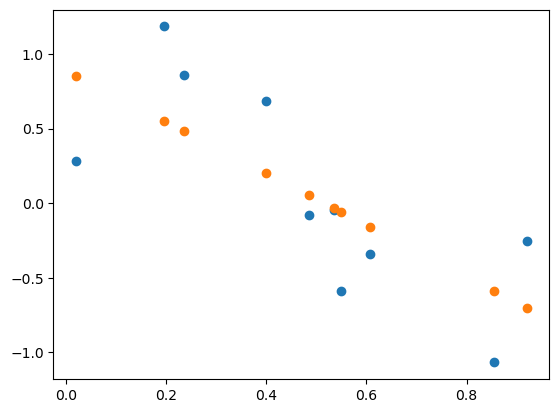

In [732]:
delta = 0.01
y_t = torch.Tensor(df[1])[None,:]
X = torch.stack((torch.ones(10, requires_grad = True),torch.tensor(df[0],requires_grad=True)),dim = 0)
w = torch.tensor(np.random.uniform(-1,1,(2,1))).requires_grad_(True)


for epoch in range(0,250):
    #print(w)
    w.requires_grad_(True)
    y = w.T@X
    e = (y_t - y)**2
    E = e.sum()
    E.backward()
    with torch.no_grad():
        w = w - delta * w.grad
    if ((epoch % 25) == 0):  
        print(f'Epoch {epoch}, Error {E}')
        
plt.scatter(X[1,:].detach(),y_t[0,:].detach())
plt.scatter(X[1,:].detach(),y[0,:].detach())

# Autograd

In [301]:
x = torch.tensor([2.,3.,1.],requires_grad=True)
y  = torch.pow(x,3)
out = torch.sum(y)
out.backward()

# sum(x**3)
# d/dx: 3x^2

#x.grad #3x^2, 12, 27, 3
x.grad

# x.grad calculates the partial derivative of the calculations x is involved into


tensor([12., 27.,  3.])

In [302]:
x_2 = torch.tensor([4.,5.,6.],requires_grad=True)
out_2 = torch.sum(x_2*3)
out_2.backward()
x_2.grad

# If x is part of multiple calculations with a different backward, it gets messed up :)

tensor([3., 3., 3.])

In [303]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a) # sin(a)
c = 2 * b # 2 * sin(a)
d = c + 1 # (2* sin(a) + 1)
out = d.sum() # sum(2 * sin(a) + 1)

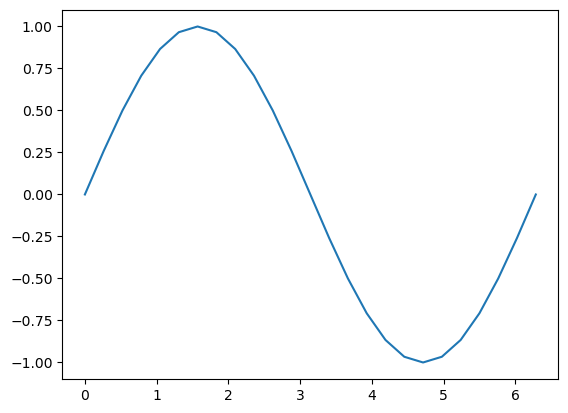

In [304]:
plt.plot(a.detach(),b.detach())

In [305]:
d.grad_fn # Addition backward
c.grad_fn # Multiplication backward
b.grad_fn # sinus backward
a.grad_fn # Nothing backward since this is the input

In [306]:
# Also previou operations can be shown
print('d:')
print(d.grad_fn) 
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)

print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x14686a9b0>, 0), (None, 0))
((<SinBackward0 object at 0x14686a5f0>, 0), (None, 0))
((<AccumulateGrad object at 0x14686a830>, 0),)
()

c:

b:

a:
None


In [ ]:
x = torch.ones(1, requires_grad=True)
y = x + 2
z = y * y * 2
# z = (x+2)* (x+2) * 2 = 2x^2 +8x + 8
# ∂z/∂x = 4x + 8

z.backward()     # automatically calculates the gradient
print(x.grad)    # ∂z/∂x = 12

## Ein anderes Mal

In [316]:
# Logistic regression
# The same input x output either 1 or 0

from torch.nn import functional as F

y_data=Variable((x_data>10)*1)


In [31]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = torch.nn.Linear(1,1)
    def forward(self,x):
        pred = F.sigmoid(self.layer(x))
        
        return pred
        
    

In [32]:
# Initialize model
model = LogisticRegression()

# Loss
loss_function = torch.nn.BCELoss()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

for i in range(1000):
    # Reset gradients
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(x_data)
    
    # Loss
    loss = loss_function(y_pred,y_data)
    
    # Backward propagation
    loss.backward()
    
    
    # Change weights
    optimizer.step()
    
print(loss)

NameError: name 'x_data' is not defined

In [35]:
class Linear_Regression(t.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = t.nn.Linear(1,1)
        
    def forward(self,x):
        pred = self.layer(x)
        return pred
    
    

In [47]:
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[0.5864]], requires_grad=True)
Parameter containing:
tensor([0.1717], requires_grad=True)


In [36]:
model = Linear_Regression()

In [30]:
loss_function = t.nn.MSELoss()



tensor([1, 2, 3])

In [38]:
model.forward(t.Tensor([1]))

tensor([0.7581], grad_fn=<ViewBackward0>)